In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv('/content/titanic_cleaned.csv')

In [5]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,2,38.0
2,1,3,2,26.0
3,1,1,2,35.0
4,0,3,1,35.0


In [6]:
df.tail()

,Survived,Pclass,Sex,Age
886,0,2,1,27.0
887,1,1,2,19.0
888,0,3,2,28.0
889,1,1,1,26.0
890,0,3,1,32.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 28.0 KB


In [8]:
df.describe()

,Survived,Pclass,Sex,Age
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,1.352413,29.361582
std,0.486592,0.836071,0.477990,13.019697
min,0.000000,1.000000,1.000000,0.420000
25%,0.000000,2.000000,1.000000,22.000000
50%,0.000000,3.000000,1.000000,28.000000
75%,1.000000,3.000000,2.000000,35.000000
max,1.000000,3.000000,2.000000,80.000000


In [9]:
df.shape

(891, 4)

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived',axis=1)
y = df['Survived']

In [11]:
X

,Pclass,Sex,Age
0,3,1,22.0
1,1,2,38.0
2,3,2,26.0
3,1,2,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,2,19.0
888,3,2,28.0
889,1,1,26.0


In [12]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train.shape

(712, 3)

In [16]:
X_test.shape

(179, 3)

In [17]:
y_train.shape

(712,)

In [18]:
y_test.shape

(179,)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

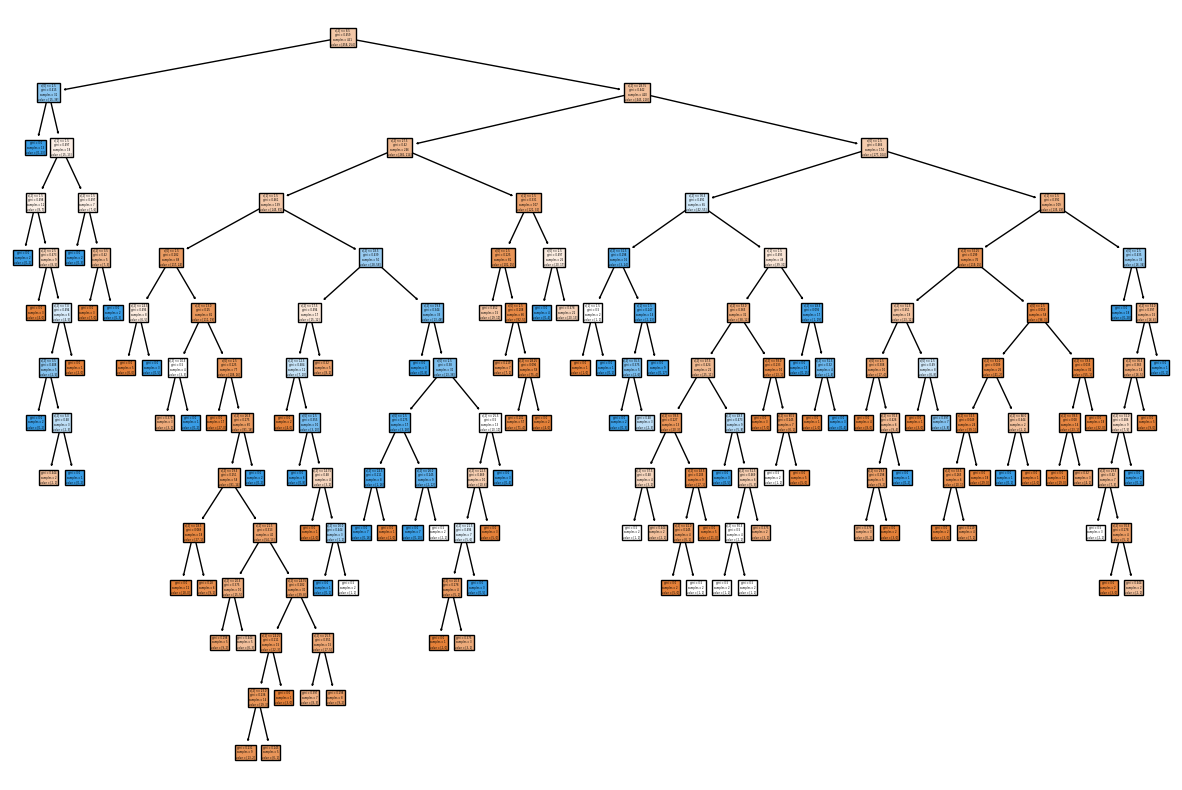

In [25]:
plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0], filled=True)
plt.show()

In [20]:
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



<Axes: >

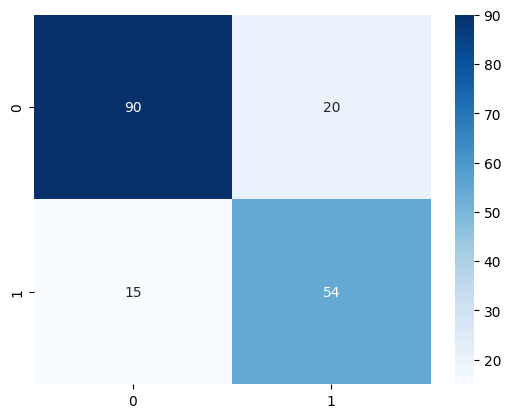

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap='Blues')

In [49]:
parameter = {
'n_estimators': [50, 100, 200],
'max_depth': [10,20,30],
'max_features': ['int','auto', 'sqrt', 'log2'],
'bootstrap': [True, False]   #randomness of tree
 }

In [50]:
from sklearn.model_selection import GridSearchCV
rfmodel = RandomForestClassifier(max_depth=2)
grid_search = GridSearchCV(estimator=rfmodel,param_grid=parameter,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=2),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'max_features': ['int', 'auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [51]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 200}

In [52]:
y_pred2 = grid_search.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



<Axes: >

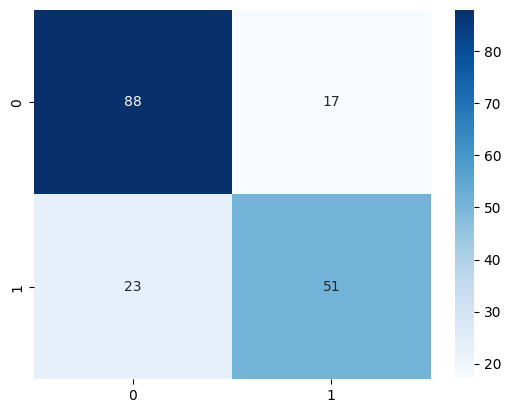

In [54]:
cm = confusion_matrix(y_test,y_pred2)
sns.heatmap(cm,annot=True,cmap='Blues')